In [1]:
import numpy as np
import gensim
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.


In [2]:
f = open('../../data/input.txt')
ds = f.read()
f.close()

In [5]:
syms = ['"', ';', ':', ',', '?', '!', '&', '(', ')', '[', ']', "'", '$', '@', '~', '-', '#']
syms_2 = ['\n', '\t', '_', '>', '<', '      ']

In [10]:
data = []
for ix in ds.split('.')[:]:
    val = ix
    # print [val]
    for s in syms:
        val = val.strip().replace(s, '')
    # print [val]
    for s in syms_2:
        val = val.strip().replace(s, ' ')
    # print [val]
    if len(val) < 500 and len(val) > 40:
        data.append(val.lower())
    # print '-'*50
# print data

In [11]:
len(data)

26116

In [14]:
for ix in data[-10:]:
    print ix.split()
    print '-'*30

['but', 'its', 'gods', 'own', 'wind', 'none', 'the', 'less', 'and', 'a', 'cleaner', 'better', 'stronger', 'land', 'will', 'lie', 'in', 'the', 'sunshine', 'when', 'the', 'storm', 'has', 'cleared']
------------------------------
['start', 'her', 'up', 'watson', 'for', 'its', 'time', 'that', 'we', 'were', 'on', 'our', 'way']
------------------------------
['i', 'have', 'a', 'check', 'for', 'five', 'hundred', 'pounds', 'which', 'should', 'be', 'cashed', 'early', 'for', 'the', 'drawer', 'is', 'quite', 'capable', 'of', 'stopping', 'it', 'if', 'he', 'can']
------------------------------
['this', 'text', 'is', 'provided', 'to', 'you', 'asis', 'without', 'any', 'warranty']
------------------------------
['no', 'warranties', 'of', 'any', 'kind', 'expressed', 'or', 'implied', 'are', 'made', 'to', 'you', 'as', 'to', 'the', 'text', 'or', 'any', 'medium', 'it', 'may', 'be', 'on', 'including', 'but', 'not', 'limited', 'to', 'warranties', 'of', 'merchantablity', 'or', 'fitness', 'for', 'a', 'particula

In [ ]:
# f = np.unique(data, return_counts=True)

In [ ]:
#plt.figure(0, figsize=(10, 10))
#plt.plot(f[0], f[1])

In [15]:
train = []
for ix in data[:]:
    train.append(ix.lower().split())
    #print '-'*80

In [17]:
train[-2:]

[['es',
  'for',
  'an',
  'electronic',
  'form',
  'of',
  'this',
  'text',
  'and',
  'additional',
  'information',
  'about',
  'it'],
 ['this', 'text', 'comes', 'from', 'the', 'collections', 'version', '3']]

In [18]:
model = gensim.models.Word2Vec(train, workers=6, iter=20)

In [37]:
model.similar_by_word('crime')

[('murder', 0.7730459570884705),
 ('tragedy', 0.6857192516326904),
 ('motive', 0.6378545761108398),
 ('importance', 0.6345316171646118),
 ('result', 0.6313340067863464),
 ('society', 0.6220712065696716),
 ('event', 0.6059354543685913),
 ('existence', 0.6000816822052002),
 ('fact', 0.5840126276016235),
 ('death', 0.5818715691566467)]

In [38]:
w = 'horse car engine travel'.split()
# model.similarity?

In [39]:
m = np.zeros((len(w), len(w)))
for ix in range(len(w)):
    for wx in range(len(w)):
        m[ix, wx] = model.similarity(w[ix], w[wx])

['horse', 'car', 'engine', 'travel']


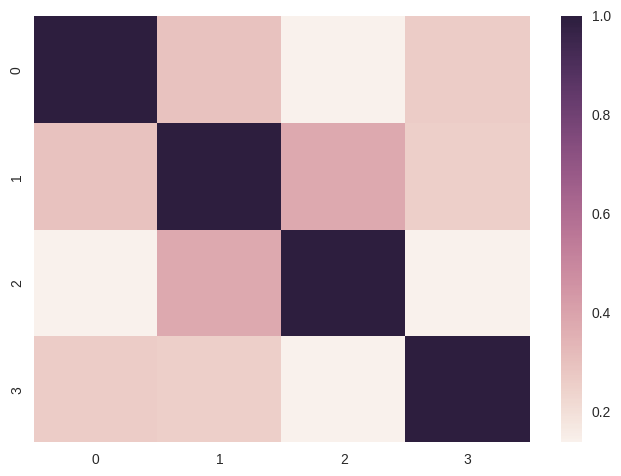

In [40]:
print w
sns.heatmap(m)

In [28]:
m.sum(axis=0)

array([1.69160921, 2.0118879 , 1.47430186, 1.78087001])

In [41]:
import spacy

In [42]:
word_embeddings = spacy.load('en', vectors='glove.6B.300d.txt')

In [44]:
type('a'), type(u'a')

(str, unicode)

In [46]:
q = word_embeddings(u'what')
print q.vector.shape

(300,)


In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
def sim(w1, w2):
    v1 = word_embeddings(w1)
    v2 = word_embeddings(w2)
    
    return cosine_similarity(v1.vector, v2.vector)

In [63]:
word1 = u'money'
word2 = u'cash'
print sim(word1, word2)

[[0.81906694]]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
